In [22]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import et_xmlfile as et
import seaborn as sns

In [10]:
# Firstly we are creating a df of the available cities from the api and countries to extract all the data we can.
url='http://www.emotionalcities.com/api/getCountryList'
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')



In [11]:
city = soup.find_all('city')
countryname = soup.find_all('name')
country = soup.find_all('country')

In [12]:
# Find the city names in the xml file from the url.
cityd = []
for i in range(0,len(city)):
    rows = [city[i].get_text()]
    cityd.append(rows)
cityd

[['Kabul'],
 ['Fier'],
 ['Goim'],
 ['Pago Pago'],
 ['Panam'],
 ['Buenos Aires'],
 ['Tigre'],
 ['Munro'],
 ['Comodoro Rivadavia'],
 ['Santa Fe'],
 ['Santiago Del Estero'],
 ['La Plata'],
 ['Villa Carlos Paz'],
 ['Tucuman'],
 ['Cmte Luis Piedra Buena'],
 ['Jujuy'],
 ['Neuquen'],
 ['Rio Gallegos'],
 ['Leandro N Alem'],
 ['Cipolletti'],
 [' Catriel'],
 ['Salto'],
 ['Yerevan'],
 ['Adelaide'],
 ['Brisbane'],
 ['Canberra'],
 ['Toowoomba'],
 ['Sydney'],
 ['Newcastle'],
 ['Perth'],
 ['Singleton'],
 ['Melbourne'],
 ['Gold Coast'],
 ['Macau'],
 ['Sippy Downs'],
 ['Launceston'],
 ['Parramatta'],
 ['Coomera'],
 ['Wien'],
 ['Dornbirn'],
 ['Baku'],
 ['Manama'],
 ['Minsk'],
 ['Etterbeek'],
 ['Gent'],
 ['Assenois'],
 ['Brussels'],
 ['Leuven'],
 ['Tienen'],
 ['Liège'],
 ['Oostende'],
 ['Genk'],
 ['Antwerp'],
 ['Lummen'],
 ['Mandu'],
 ['Santa Cruz'],
 ['Santa Cruz De La Sierra'],
 ['Sarajevo'],
 ['Mostar'],
 ['Banja Luka'],
 ['Prijedor'],
 ['Sao Paulo'],
 ['Campina Grande'],
 ['Farroupilha'],
 ['Brasilia

In [13]:
citydf = pd.DataFrame(cityd, columns = ['city'], dtype = str)
citydf

,city
0,Kabul
1,Fier
2,Goim
3,Pago Pago
4,Panam
...,...
790,Montevideo
791,Caracas
792,Ho Chi Minh
793,Hai Duong


In [14]:
countryd = []
for i in range(0,len(country)):
    rows = [countryname[i].get_text()]
    countryd.append(rows)

countrydf = pd.DataFrame(countryd, columns = ['country'], dtype = str)


countrydf

,country
0,Afghanistan
1,Albania
2,American Samoa
3,Andorra
4,Argentina
...,...
89,United Kingdom
90,United States
91,Uruguay
92,Venezuela


In [15]:
dataframes = pd.DataFrame()
dataframes

""


In [63]:
dfo = df
dfo

,date,value,city
0,2015-01-01,7,Washington Dc
1,2015-01-02,7,Washington Dc
2,2015-01-03,7,Washington Dc
3,2015-01-04,7,Washington Dc
4,2015-01-05,7,Washington Dc
...,...,...,...
37225,2020-12-25,3,Glasgow
37226,2020-12-26,3,Glasgow
37227,2020-12-27,3,Glasgow
37228,2020-12-28,3,Glasgow


A limitation with the emotional cities api is that the documentation is very unclear. As a result I did not use the apis for cities with the same name. For example London is in Canada and the UK and would have been an interesting city to include in the data. It is unclear in the xml file which country London is referring to, Canada or the UK. Another example is Cambridge which in this api is in Canada and the US.

In [61]:
#'Chicago', 'Milano', 'Tel Aviv', 'New York', 'Mumbai', 'Tokyo', 'Stockholm', 'Amsterdam', 'Bristol', 'Paris', 'Cape Town', 'Cairo', 'Singapore', 'Berlin', 'Moscow', 'Budapest', 'Kabul', 'Kampala', 'Londonerry', 'Dublin', 'Belfast', 'Sydney', 'Lagos', 'Madrid', 'Lisbon', 'Oslo', 'Toronto','Nairobi','Hong Kong', 'Osaka', 'Munich'
cities = ['Washington Dc', 'Las Vegas', 'Columbus', 'Detroit', 'Dayton', 'San Francisco', 'Dallas', 'Orlando', 'Denver', 'Sacramento', 'Swindon','Leeds','Oxford','Nottingham','Preston','Cardiff','Glasgow']
url_base = "http://www.emotionalcities.com/api/getCityMood/{}/2015-1-1/2190"
dataframes = []
# // Begin a loop, dealing with series one by one:
for i in range(len(cities)):
    c = cities[i]
    s = c.replace(' ','')
    print(c)
    URL = url_base.format(c)
    print(URL)
    # // Request the html from the URL:
    html = requests.get(URL)
   
    # // Get the soup of this page
    soup = BeautifulSoup(html.content, 'html.parser')
    # // Now get what we want from the page: 
    date = soup.find_all('date')
    value = soup.find_all('value')
    status = soup.find_all('status')
    median = soup.find_all('median')
    for j in range(0,len(median)):
        rows = [date[j].get_text(),value[j].get_text(), c]
        dataframes.append(rows)
        df = pd.DataFrame(dataframes,columns=['date', 'value', 'city'])
    
    


Washington Dc
http://www.emotionalcities.com/api/getCityMood/Washington Dc/2015-1-1/2190
Las Vegas
http://www.emotionalcities.com/api/getCityMood/Las Vegas/2015-1-1/2190
Columbus
http://www.emotionalcities.com/api/getCityMood/Columbus/2015-1-1/2190
Detroit
http://www.emotionalcities.com/api/getCityMood/Detroit/2015-1-1/2190
Dayton
http://www.emotionalcities.com/api/getCityMood/Dayton/2015-1-1/2190
San Francisco
http://www.emotionalcities.com/api/getCityMood/San Francisco/2015-1-1/2190
Dallas
http://www.emotionalcities.com/api/getCityMood/Dallas/2015-1-1/2190
Orlando
http://www.emotionalcities.com/api/getCityMood/Orlando/2015-1-1/2190
Denver
http://www.emotionalcities.com/api/getCityMood/Denver/2015-1-1/2190
Sacramento
http://www.emotionalcities.com/api/getCityMood/Sacramento/2015-1-1/2190
Swindon
http://www.emotionalcities.com/api/getCityMood/Swindon/2015-1-1/2190
Leeds
http://www.emotionalcities.com/api/getCityMood/Leeds/2015-1-1/2190
Oxford
http://www.emotionalcities.com/api/getCityM

In [62]:
df['city'].unique()

array(['Washington Dc', 'Las Vegas', 'Columbus', 'Detroit', 'Dayton',
       'San Francisco', 'Dallas', 'Orlando', 'Denver', 'Sacramento',
       'Swindon', 'Leeds', 'Oxford', 'Nottingham', 'Preston', 'Cardiff',
       'Glasgow'], dtype=object)

In [65]:
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype(float)
df.dtypes
dfo = df

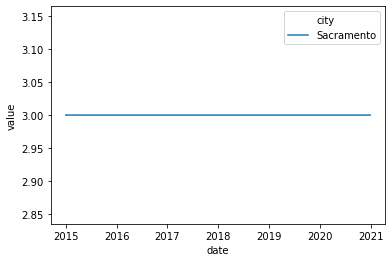

In [71]:


sns.lineplot(data=df[df['city']=='Sacramento'],x='date',y='value',hue='city')


In [34]:
cities = ['Chicago', 'Milano', 'Paris', 'Tokyo', 'Tel Aviv']
url_base = "http://www.emotionalcities.com/api/getCityMood/{}/2015-1-1/2190"
dataframes_list = []
# // Begin a loop, dealing with series one by one:
c = cities[i]
s = c.replace(' ','')
s = pd.DataFrame()
print(s.dtypes)
print(c)
URL = url_base.format(c)
print(URL)
    # // Request the html from the URL:
html = requests.get(URL)
   
    # // Get the soup of this page
soup = BeautifulSoup(html.content, 'html.parser')
   
    # // Now get what we want from the page: 
date = soup.find_all('date')

value = soup.find_all('value')
status = soup.find_all('status')
median = soup.find_all('median')
#for j in range(0,len(median)):
#    rows = [date[j].get_text(),value[j].get_text()]
#    print(s.append(rows))
print(date[0].get_text())

Series([], dtype: object)
Tel Aviv
http://www.emotionalcities.com/api/getCityMood/Tel Aviv/2015-1-1/2190
2015-01-01
